In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data


# Combine the data into a single dataset


# Display the data table for preview



In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_to_load = pd.read_csv("Data/mouse_drug_data.csv")
clinical_trial_data_to_load = pd.read_csv("Data/clinicaltrial_data.csv")

In [3]:
mouse_drug_data_to_load.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
clinical_trial_data_to_load.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
drug_trial_data = clinical_trial_data_to_load.merge(mouse_drug_data_to_load, on = 'Mouse ID', how = 'outer')
drug_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [6]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response_df = drug_trial_data[['Drug', 'Timepoint', 'Tumor Volume (mm3)']]
tumor_response_df = pd.DataFrame(tumor_response_df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())

In [8]:
# Convert to DataFrame

tumor_response_df["Volume SEM"] = tumor_response_df['Tumor Volume (mm3)'].sem()
tumor_response_df.reset_index(inplace = True)
tumor_response_df.head()


,Drug,Timepoint,Tumor Volume (mm3),Volume SEM
0,Capomulin,0,45.000000,0.898067
1,Capomulin,5,44.266086,0.898067
2,Capomulin,10,43.084291,0.898067
3,Capomulin,15,42.064317,0.898067
4,Capomulin,20,40.716325,0.898067


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')  
tumor_response_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [10]:
# Store the Standard Error of Tumor Response rouped by Drug and Timepoint
tumor_response_sem_pivot = tumor_response_df.pivot_table(index='Timepoint',columns='Drug',values='Volume SEM')  
tumor_response_sem_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


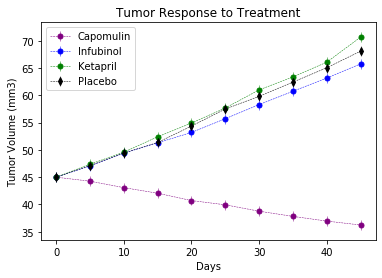

In [11]:
plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Capomulin'], yerr=tumor_response_sem_pivot['Capomulin'],
             color='purple', marker='o', markersize=5, linestyle='--', linewidth=0.5, label ='Capomulin')

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Infubinol'], yerr=tumor_response_sem_pivot['Infubinol'],
             color='b', marker='o', markersize=5, linestyle='--', linewidth=0.5, label ='Infubinol')

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Ketapril'], yerr=tumor_response_sem_pivot['Ketapril'],
             color='g', marker='o', markersize=5, linestyle='--', linewidth=0.5, label ='Ketapril')

plt.errorbar(tumor_response_pivot.index, tumor_response_pivot['Placebo'], yerr=tumor_response_sem_pivot['Placebo'],
             color='black', marker='d', markersize=5, linestyle='--', linewidth=0.5, label ='Placebo')

x_lim = len(tumor_response_pivot.index)
# Chart title
plt.title("Tumor Response to Treatment")
# x label
plt.xlabel("Days")
# y label
plt.ylabel("Tumor Volume (mm3)")

plt.legend()
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


In [13]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoin
metastatic_response_df = clinical_trial_data_to_load.merge[['Drug', 'Timepoint', 'Metastatic Sites']]

TypeError: 'method' object is not subscriptable

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)